# Advanced Plotting

[Jupyter Notebook](https://lancejnelson.github.io/PH135/jupyter/advancedPlotting.ipynb)


In this chapter you will learn how to plot functions of more than one variable $F(x,y)$. Functions like this can be visualized by making a contour plots (like a topographic map) or by displaying the function value as height above the $x-y$ plane like a perspective drawing. You can also display vector-valued function $\mathbf{F}(x,y)$ using vector field plots.



## Making 2-D Grids
When plotting a function of one variable, recall that the first step was to use `linspace` or `arange` to construct a grid of points spanning the domain of the function.  For a function of two variables the domain is two-dimensional and hence the grid will also need to be two-dimensional.  In other words, we need to construct a set of x-y pairs the spans the two-dimensional domain. We can do this using  `numpy.meshgrid` and `numpy.mgrid`. Let's see an example and then explain the pieces.  Below you will find some code to plot the function: $$f(x,y) = \cos({\pi \over 2} x) \exp(-y^2)$$ (see the code comments)


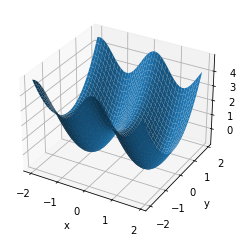

In [1]:
from numpy import arange,meshgrid,cos,exp,pi,mgrid,sin
from matplotlib import pyplot
#from mpl_toolkits.mplot3d import Axes3D  #<- You need this to make 3D plots
# Define the arrays x and y
# Don't make the step size too small or you will kill the
# system (you have a large, but finite amount of memory)
x=arange(-2,2,0.1)
y=arange(-2,2,0.1)
# Use meshgrid to convert these 1-d arrays into 2-d matrices
# of x and y values over the plane
X,Y=meshgrid(x,y)
#X,Y=mgrid[-1:1:0.1,0:1.5:0.1]  # You could also do this in place of meshgrid
# Get F(x,y) by using F(X,Y).
# rather than with x and y
F=sin(X*3+pi/3)+Y**2
# Plot the function
fig = pyplot.figure()
#ax=fig.gca(projection='3d')
ax=pyplot.axes(projection='3d')
ax.plot_surface(X,Y,F)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

>**_To Do:_**
>
>1. Print out `X` and `Y` and inspect the output until you understand what meshgrid does.
>2. Replace the function in the cell above with one of your choosing.


Let's break down this block of code one piece at a time.  First, notice that anytime you want a 3 dimensional plot, you have to create a three-dimensional set of axes with the following command


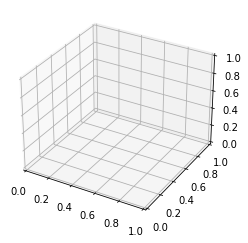

In [11]:
#| eval: false
ax=pyplot.axes(projection='3d')  # Set the axes to be 3 dimensional

Next, `meshgrid` turns the one-dimensional arrays `x` and `y` into two-dimensional arrays `X` and `Y`. As an example, inspect the output from the cell below:

In [16]:
from numpy import meshgrid
x = [1,2,3]
y = [4,5]

X,Y = meshgrid(x,y)
print(X)
print(Y)

[[1 2 3]
 [1 2 3]]
[[4 4 4]
 [5 5 5]]


These two arrays provide a set of x-y coordinate pair that span the domain, as illustrated in the figure.

![meshgrid](https://lancejnelson.github.io/PH135/figures/figMeshGrid.pdf)

Numpy also has a command called `mgrid` which is similar to `meshgrid` but does the conversion to two dimensions the other way around. As an example, inspect the output in the cell below.


In [8]:
from numpy import mgrid

X,Y = mgrid[1:4,2:4]
print(X)
print(Y)


X,Y = mgrid[1:4:0.5,4:6:0.5]  
print(X)
print(Y)


X,Y = mgrid[1:4:10j,4:6:10j] 
print(X)
print(Y)

[[1 1]
 [2 2]
 [3 3]]
[[2 3]
 [2 3]
 [2 3]]
[[1.  1.  1.  1. ]
 [1.5 1.5 1.5 1.5]
 [2.  2.  2.  2. ]
 [2.5 2.5 2.5 2.5]
 [3.  3.  3.  3. ]
 [3.5 3.5 3.5 3.5]]
[[4.  4.5 5.  5.5]
 [4.  4.5 5.  5.5]
 [4.  4.5 5.  5.5]
 [4.  4.5 5.  5.5]
 [4.  4.5 5.  5.5]
 [4.  4.5 5.  5.5]]
[[1.         1.         1.         1.         1.         1.
  1.         1.         1.         1.        ]
 [1.33333333 1.33333333 1.33333333 1.33333333 1.33333333 1.33333333
  1.33333333 1.33333333 1.33333333 1.33333333]
 [1.66666667 1.66666667 1.66666667 1.66666667 1.66666667 1.66666667
  1.66666667 1.66666667 1.66666667 1.66666667]
 [2.         2.         2.         2.         2.         2.
  2.         2.         2.         2.        ]
 [2.33333333 2.33333333 2.33333333 2.33333333 2.33333333 2.33333333
  2.33333333 2.33333333 2.33333333 2.33333333]
 [2.66666667 2.66666667 2.66666667 2.66666667 2.66666667 2.66666667
  2.66666667 2.66666667 2.66666667 2.66666667]
 [3.         3.         3.         3.         3.    

>**_To Do:_**
>
>1. Examine all three sets of output from the cell above until you understand the differences.
>2. What happens when you add a third argument to `mgrid`?
>3. What happens if the third argument is imaginary (i.e. `10j`)?


All three-dimensional plots will require that you first use `meshgrid` or `mgrid` to generate a grid over the two-dimensional domain.

The default viewing angle can often be less than optimal for viewing the function well.  To modify the viewing angle, use the function `view_init`, which takes up to three arguments: the viewing altitude, the rotation angle about the z-axis, and the rotation angle above the x-y plane.



## Surface Plots
You've already seen an example of a surface plot above.  A similar plot can be generated by replacing `plot_surface` with `plot_wireframe`.  This plot looks similar to the surface plot shown above.  See the cell below for an example.


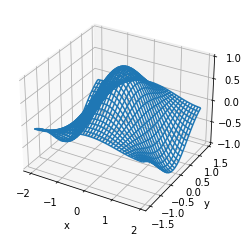

In [18]:
from numpy import arange,meshgrid,cos,exp,pi,mgrid
from matplotlib import pyplot

x=arange(-2,2,0.1)
y=arange(-1.5,1.5,0.1)

X,Y=meshgrid(x,y)

F=cos(pi/2*X)*exp(-Y**2)

ax=pyplot.axes(projection='3d')
ax.plot_wireframe(X,Y,F)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

## Contour Plots

Python generates contour plots very similarly to surface plots. Instead of using `plot_surface` or `plot_wireframe`, the function `contour` is used. Look at the example below.


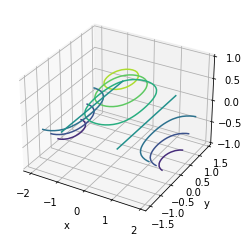

In [19]:
from numpy import arange,meshgrid,cos,exp,pi,mgrid
from matplotlib import pyplot

x=arange(-2,2,0.1)
y=arange(-1.5,1.5,0.1)

X,Y=meshgrid(x,y)

F=cos(pi/2*X)*exp(-Y**2)

ax=pyplot.axes(projection='3d')
ax.contour(X,Y,F)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

### The `levels` keyword argument
The keyword argument `levels` can be added to the function call to specify which (or how many) contours are displayed.  If `levels = n` where `n` is an integer, the `contour` function will plot `n` contours.  If `levels = [a,b,c]` then the `contour` function will lines of constant value equal to the values specified. The code block below gives a few examples. 


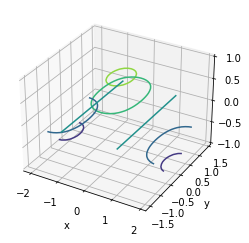

In [21]:
from numpy import arange,meshgrid,cos,exp,pi,mgrid
from matplotlib import pyplot

x=arange(-2,2,0.1)
y=arange(-1.5,1.5,0.1)

X,Y=meshgrid(x,y)

F=cos(pi/2*X)*exp(-Y**2)

ax=pyplot.axes(projection='3d')
ax.contour(X,Y,F,levels = 5)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

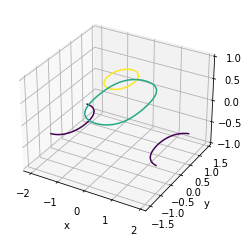

In [23]:
from numpy import arange,meshgrid,cos,exp,pi,mgrid
from matplotlib import pyplot

x=arange(-2,2,0.1)
y=arange(-1.5,1.5,0.1)

X,Y=meshgrid(x,y)

F=cos(pi/2*X)*exp(-Y**2)

ax=pyplot.axes(projection='3d')
ax.contour(X,Y,F,levels = [-0.5,0.25,0.75])
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

## Vector-Field Plots
In electricity and magnetism you'll encounter functions that produce a vector ($\mathbf{F}(x,y)$) instead of a number($F(x,y)$) like you may be used to.  In other words, instead of associating a number with every (x,y) pair, a vector $(f_x,f_y)$ is associated with each pair.  You can plot a vector field using the `quiver` function, which takes four required arguments. The first two are the output from `meshgrid` just as with the other plots we have done.  The third and fourth arguments are the components of the vectors at each (x,y) pair. Below is an example of how to plot the following vector-valued function $$\mathbf{B} = (-y/(x^2 + y^2),x/(x^2 + y^2))$$ 


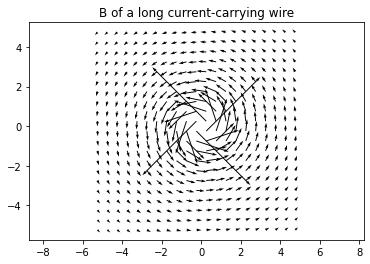

In [24]:
from numpy import arange, meshgrid,sqrt,log
from matplotlib import pyplot
x = arange(-5.25,5.25,0.5) # define the x and y grids (avoid (0,0))
y = arange(-5.25,5.25,0.5) # define the x and y grids (avoid (0,0))
X,Y=meshgrid(x,y)

# Magnetic field of a long current-carrying wire
Bx=-Y/(X**2+Y**2)
By=X/(X**2+Y**2)
# make the field arrow plot
pyplot.figure()
pyplot.quiver(X,Y,Bx,By)
pyplot.axis('equal')  # make the x and y axes be equally scaled
pyplot.title('B of a long current-carrying wire')
pyplot.show()


Often, the lengths of these vectors will be large and that makes it hard to look at the graphic. One option for improving this is to force all of the vectors to have length $1$ and then color the vector according to the true length.  To set the color of the arrows, add a fifth argument to the function that contains the vector lengths. You can then add the keyword argument `cmap` to specify the color spectrum to use. My favorite is `gist_rainbow` but there are other [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html). 


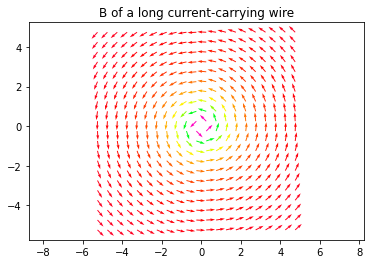

In [25]:
from numpy import arange, meshgrid,sqrt,log
from matplotlib import pyplot
x = arange(-5.25,5.25,0.5) # define the x and y grids (avoid (0,0))
y = arange(-5.25,5.25,0.5) # define the x and y grids (avoid (0,0))
X,Y=meshgrid(x,y)

# Magnetic field of a long current-carrying wire
Bx=-Y/(X**2+Y**2)
By=X/(X**2+Y**2)
B = sqrt(Bx**2 + By**2)  # Find the magnitude of the vectors.
# make the field arrow plot
pyplot.figure()
pyplot.quiver(X,Y,Bx/B,By/B,B,cmap="gist_rainbow")  # Divide by magnitude to make them equal to 1
pyplot.axis('equal')  # make the x and y axes be equally scaled
pyplot.title('B of a long current-carrying wire')
pyplot.show()


## Animations
Often you will want to see how a plot evolves over time. Maybe you are plotting the waveform on a string and you want to see how it changes in time. Animations can be built by repeatedly constructing a new plot and then waiting before you clear the canvas and plot again. Look at the example below to see how to do this:

In [1]:
#| eval: false
#| 
from numpy import arange,sin,cos
from matplotlib import pyplot
%matplotlib

t=0
x = arange(0,5,0.01) #Domain over which I want to plot the function.
while t < 10:
    y=sin(5*x-3*t)*cos(2*x) #Constructarrayoffunction
                                         # values at current time.
    pyplot.clf()  # Clear the canvas, otherwise all plots end up on
                  # top of each other
    pyplot.plot(x,y,'r-',linewidth=3)
    pyplot.xlabel('x')
    pyplot.ylabel('f(x)')
    pyplot.title('t = {:.4f}'.format(t))
    pyplot.draw()
    pyplot.pause(0.01)
    t += .1
# draw the plot, but don't wait for
# someone to close the window.
# Wait before plotting the next one.
# Advance time.

Using matplotlib backend: Qt5Agg


## Flashcards
1. Describe the use and output of `meshgrid`.
2. What is the difference between `meshgrid` and `mgrid`?
3. What are the three lines of code that must be included if you are building a three-dimensional plot?
4. What is the difference between `plot_surface` and `plot_wireframe`?
5. What does the `levels` keyword argument do when making a contour plot? (What possible values can this argument take?)
6. What is a vector-field plot and how do you generate one in python?
7. What keyword argument controls the color of the vectors in a vector-field plot?
8. Where can you find the parable of the laborers in the vineyard?

## Exercises
1. Plot the following function from $-5 < x,y < 5$ $$ f(x,y) = {\sin (x y)\over x^2 + y^2}$$

In [2]:
import numpy as np
from matplotlib import pyplot as plt

Text(0.5, 0, 'y')

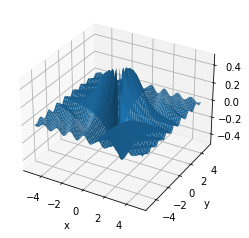

In [3]:
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
X,Y = np.meshgrid(x,y)
F = np.sin(X*Y)/(X**2 + Y**2)
ax = plt.axes(projection = '3d')
ax.plot_surface(X,Y,F)
plt.xlabel("x")
plt.ylabel("y")

2. Make a contour plot of the function from problem 1. The contours you plot should be where $f(x,y) = -0.25, 0, 0.25$.

In [2]:
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
X,Y = np.meshgrid(x,y)
F = np.sin(X*Y)/(X**2 + Y**2)
ax = plt.axes(projection = '3d')
ax.contour(X,Y,F,levels=[-.25,0,.25])
plt.xlabel("x")
plt.ylabel("y")
plt.inview
plt.show()

NameError: name 'np' is not defined

3. The range of a projectile launched on level ground is given by: $$ R = {v_i^2 \sin(2 \theta)\over g}$$ where $v_i$ is the launch speed, $\theta$ is the launch angle, and $g = 9.8$ m/s$^2$ is the acceleration due to gravity.  Plot $R(v_i,\theta)$ for $0 < v_i < 50$ m/s and $0 < \theta < 90^\circ$.  Now write a single sentence summarizing the results of the plot.

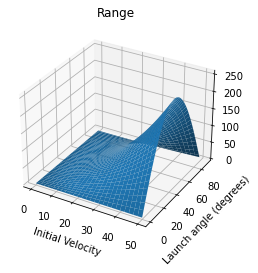

In [5]:
v0 = np.arange(0,51)
theta = np.arange(0,90)
g = 9.8
v,θ= np.meshgrid(v0,theta)
R = v**2 * np.sin(2*θ*np.pi/180)/g
ax = plt.axes(projection='3d')
ax.plot_surface(v,θ,R)
plt.xlabel("Initial Velocity")
plt.ylabel("Launch angle (degrees)")
plt.title("Range")
plt.show()

#### The plot shows that there is a maximized range when the launch angle is around 45$^\circ$ and it increases as the initial velocity increases.

4. (Extra Credit) The angle of impact for a projectile launched with initial speed $v$, launch angle $\theta$, and initial height $y_i$ is given by: $$ \phi = \tan^{-1} \left( {\sqrt{v^2 \sin^2\theta + 2 g y_0} \over v \cos \theta} \right) $$  Plot the impact angle as a function of $v$ and $\theta$ ($\phi(v,\theta)$) for $0 < v_i < 50$ m/s and $0 < \theta < 90^\circ$ and $y_i = 10$ m.   Then write a single sentence summarizing the results of the plot.

C:\Users\bryce\AppData\Local\Temp/ipykernel_27204/4250169103.py:6: RuntimeWarning: divide by zero encountered in true_divide
  R = np.arctan(np.sqrt(v**2 * np.sin(θ*np.pi/180)**2 + 2*g*y)/(v*np.cos(θ*np.pi/180)))


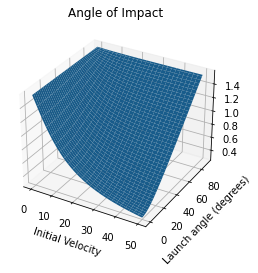

In [6]:
v0 = np.arange(0,51)
theta = np.arange(0,90)
g = 9.8
y = 10
v,θ= np.meshgrid(v0,theta)
R = np.arctan(np.sqrt(v**2 * np.sin(θ*np.pi/180)**2 + 2*g*y)/(v*np.cos(θ*np.pi/180)))
ax = plt.axes(projection='3d')
ax.plot_surface(v,θ,R)
plt.xlabel("Initial Velocity")
plt.ylabel("Launch angle (degrees)")
plt.title("Angle of Impact")
plt.show()

#### As the launch angle increases, the angle of impact increases. As the initial velocity increases, the anlge of impact decreases. 